# 1- Feature Reduction and Clustering

1. Apply the PCA module implemented in the scikit learn toolbox to reduce the training data
dimension from 784 to 3. Please do not include the label information as PCA input.

In [55]:
import numpy as np
from sklearn.decomposition import PCA

data = np.genfromtxt('sample_data/mnist_train_small.csv', delimiter=',')
print(data.shape)

y = data[:,0]
X = data[:,1:]

pca = PCA(n_components=3)
pca.fit(X)

transformed_X = pca.transform(X)
print(transformed_X.shape)

(20000, 785)
(20000, 3)


2. Visualize the 3-dimensional data in a 3D scatter plot for 10 different classes with different
colors. Make sure all 10 classes are present and no class of data is missing. To avoid too
many samples per class, you can select 20 samples per class for better visualization.

(1000, 3)
(1000,)


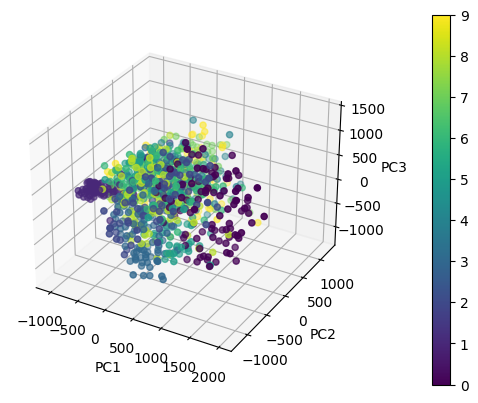

In [56]:
import matplotlib.pyplot as plt

extracted_data = np.concatenate([transformed_X[y==i][:100] for i in range(10)])
extracted_data_label = np.concatenate([np.array([i]*100) for i in range(10)])

print(extracted_data.shape)
print(extracted_data_label.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(extracted_data[:,0], extracted_data[:,1], extracted_data[:,2], c=extracted_data_label)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

fig.colorbar(scatter, pad = 0.15)
plt.show()

3. Fit the K-Means module in the scikit learn toolbox to the training data of reduced dimension
3 by PCA from the previous steps.

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

kmeans.fit(extracted_data)

labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4. Visualize the clustering results in a 3D scatter plot with 10 different cluster colors. To avoid
too many samples per class, you can select 20 samples per class for better visualization.

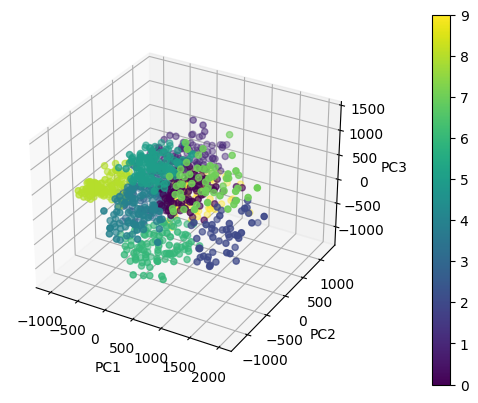

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(extracted_data[:,0], extracted_data[:,1], extracted_data[:,2], c = labels)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

fig.colorbar(scatter, pad = 0.15)
plt.show()

# 2- Multi-class Classification by Ridge Classification Using the provided dataset files located in your Colab content folder (sample_data/mnist_train_small.csv and sample_data/mnist_test.csv) as your training and test data, complete the following tasks:

In [59]:
import numpy as np

# Loading CSV file
train_data = np.genfromtxt('sample_data/mnist_train_small.csv', delimiter=',')
test_data = np.genfromtxt('sample_data/mnist_test.csv', delimiter=',')

# Extracting the label and the data features
train_y = train_data[:,0]
train_X = train_data[:,1:]
test_y = test_data[:,0]
test_X = test_data[:,1:]

# Printing the shape of the array
print(train_data.shape)
print(test_data.shape)

(20000, 785)
(10000, 785)


1. Fit the PCA module implemented in the scikit learn toolbox to the training data with 100
principle components to be reserved. Transform both the training data dimension and the
testing data dimension from 784 to 100.

In [60]:
from sklearn.decomposition import PCA

# Defining the PCA module
pca = PCA(n_components=100)

# Fitting the PCA module into the training and testing data
pca.fit(train_X)
pca.fit(test_X)

# Transforming the data into a reduced dimension
transformed_train_X = pca.transform(train_X)
transformed_test_X = pca.transform(test_X)

# Checking the shape
print(transformed_train_X.shape)
print(transformed_test_X.shape)

(20000, 100)
(10000, 100)



2. Train the RidgeClassifier module in the scikit learn toolbox on the reduced-dimension
training dataset and test on the reduced-dimension test dataset.

In [61]:
# Training an SGD clssifier on the reduced-dimension training dataset
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(transformed_train_X, train_y)
predicted_labels = sgd.predict(transformed_test_X)

3. Print the confusion matrix of your model on the test dataset.

In [62]:
from sklearn.metrics import confusion_matrix

# Printing the confusion matrix of the model on the test dataset
cm = confusion_matrix(test_y, predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 949    0    0    2    0   18    4    3    3    1]
 [   1 1077    2    9    0    2    5    4   33    2]
 [  25   41  800   57    3   15   31   22   31    7]
 [   9    4   17  913    4   23    6   10   11   13]
 [  14   12   17    9  674   16   45   10   49  136]
 [  16    6   10   53    1  715   23   11   42   15]
 [  22    5   14    1   10   15  879    4    8    0]
 [   5   19   18    9    6    1    5  920    4   41]
 [  29   17    8   85    8   49   30    9  711   28]
 [  18    9    6   18   26    6    3   36   46  841]]


# 3- Convolutional Neural Network

In [63]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=True)


1. Visualize 10 images from the MNIST dataset, 1 image from each class.

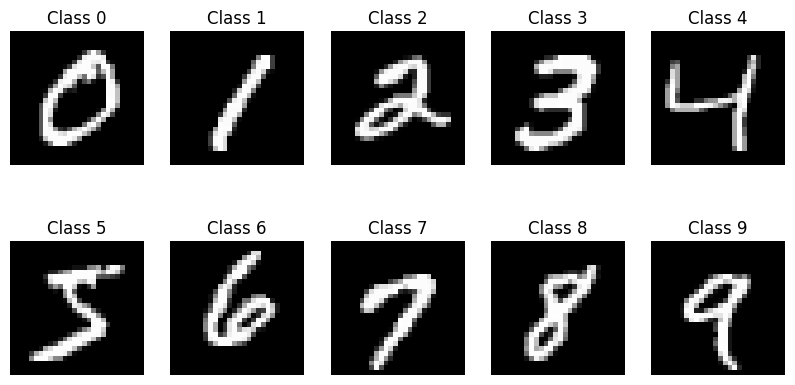

In [64]:
class_images = {}

for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    if label not in class_images:
        class_images[label] = image
    if len(class_images) == 10:
        break

# Plot the images
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(class_images[i][0], cmap='gray')
    ax.set_title(f'Class {i}')
    ax.axis('off')
plt.show()

2. Implement a convolutional neural network with 2 convolutional layer and 2 fully connected
layer to fulfill the requirement:

In [65]:
from torch import nn
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.relu(self.conv2(x))
        x = x.view(-1, 16 * 7 * 7) # flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = ConvNet()

3. Train the model on the training set. Plot the training accuracy and training loss dynamics
against the epochs.

In [66]:
n_epochs = 10

import torch.optim as optim

# Defining the optimizer and the loss
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Training the model
acc_list = []
loss_list = []

for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 10 == 0:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

# Testing the model
    correct = 0
    total = 0
    with torch.no_grad():
      for data in test_loader:
          images, labels = data
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
      loss_list.append(running_loss)
      acc_list.append(100*correct // total)

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
print('Finished Training')

[1,     1] loss: 0.001
[1,    11] loss: 0.012
[1,    21] loss: 0.011
[1,    31] loss: 0.011
[1,    41] loss: 0.011
[1,    51] loss: 0.011
[1,    61] loss: 0.011
[1,    71] loss: 0.011
[1,    81] loss: 0.011
[1,    91] loss: 0.011
[1,   101] loss: 0.010
[1,   111] loss: 0.008
[1,   121] loss: 0.005
[1,   131] loss: 0.003
[1,   141] loss: 0.003
[1,   151] loss: 0.002
[1,   161] loss: 0.002
[1,   171] loss: 0.002
[1,   181] loss: 0.002
[1,   191] loss: 0.002
[1,   201] loss: 0.002
[1,   211] loss: 0.002
[1,   221] loss: 0.002
[1,   231] loss: 0.002
Accuracy of the network on the 10000 test images: 90 %
[2,     1] loss: 0.000
[2,    11] loss: 0.002
[2,    21] loss: 0.002
[2,    31] loss: 0.002
[2,    41] loss: 0.002
[2,    51] loss: 0.001
[2,    61] loss: 0.001
[2,    71] loss: 0.001
[2,    81] loss: 0.001
[2,    91] loss: 0.002
[2,   101] loss: 0.001
[2,   111] loss: 0.001
[2,   121] loss: 0.001
[2,   131] loss: 0.001
[2,   141] loss: 0.001
[2,   151] loss: 0.001
[2,   161] loss: 0.001
[2

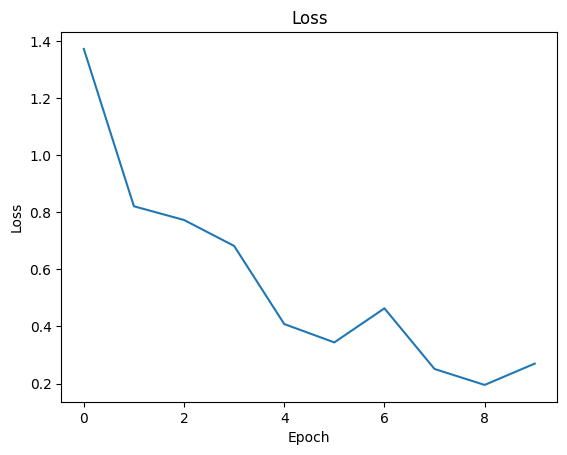

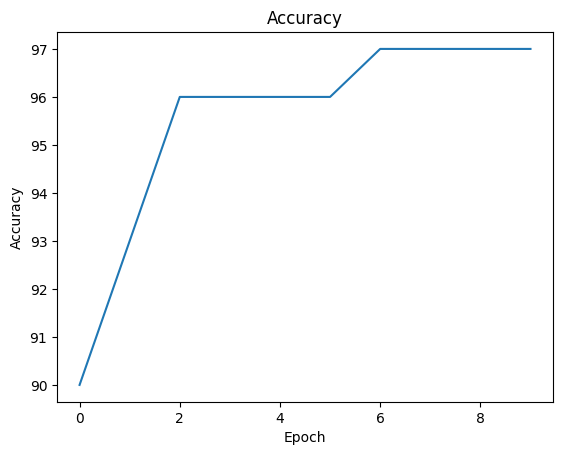

In [67]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(loss_list)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('loss.png')

plt.figure()
plt.plot(acc_list)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('accuracy.png')

4. Report the testing accuracy after the final epoch used in experiments.

In [68]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %
